In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load selected Log file

In [27]:
LOGDIR = os.path.join("logs")
FILE_PATH = os.path.join(LOGDIR, "5000_100_002_200.csv")

In [28]:
# Define the metrics to plot
metrics = [
    "avg_execution_time", "avg_memory_usage", "worst_solution_fitness", 
    "best_solution_fitness", "avg_solution_fitness", "variance_solution_fitness"
]
sns.set_theme(style="darkgrid")

## Plot the metrics

In [31]:
MAX_DATA_SIZE = 500
df = pd.read_csv(FILE_PATH)
df = df[df['dataset_size'] <= MAX_DATA_SIZE]

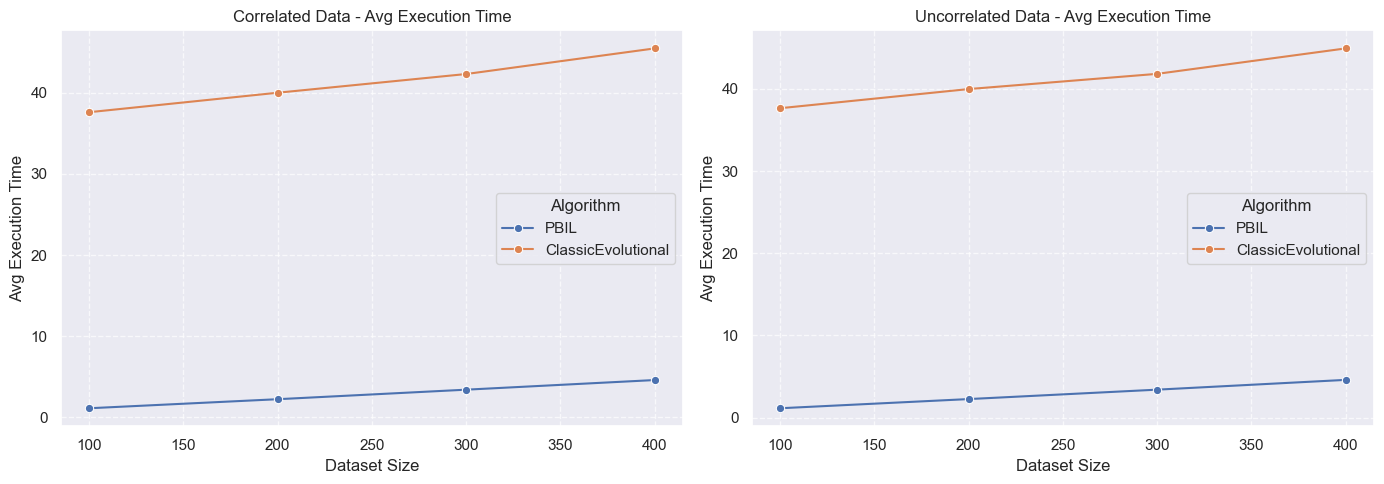

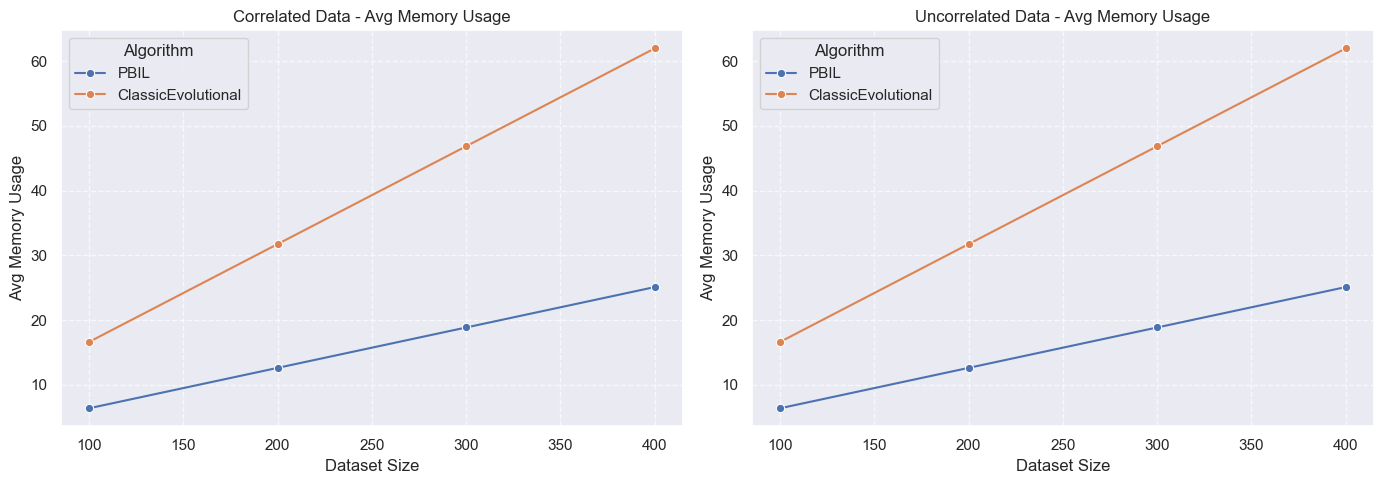

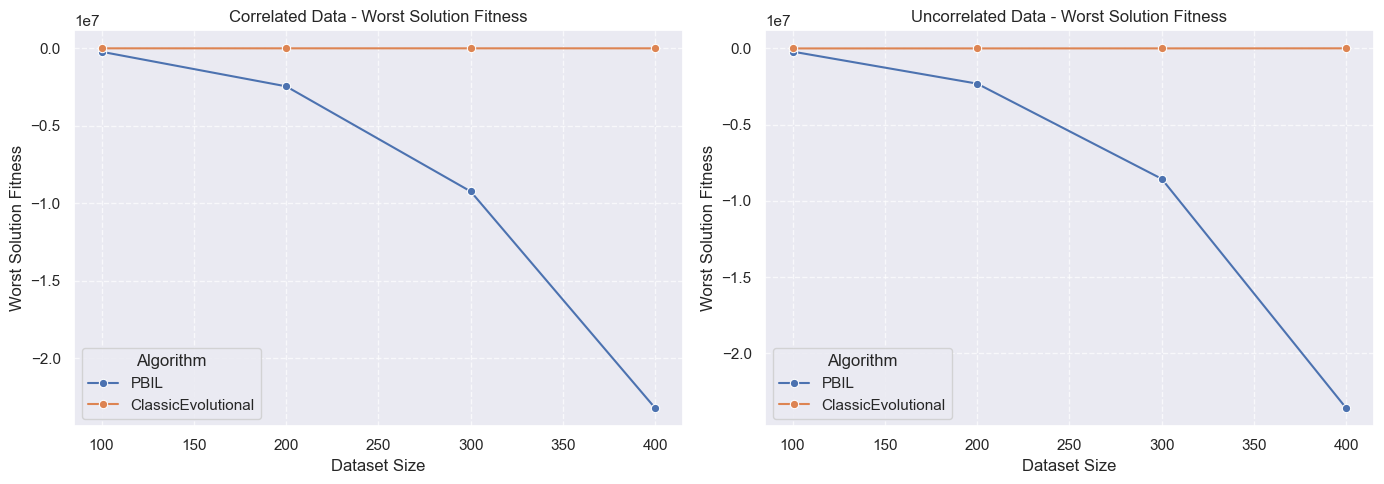

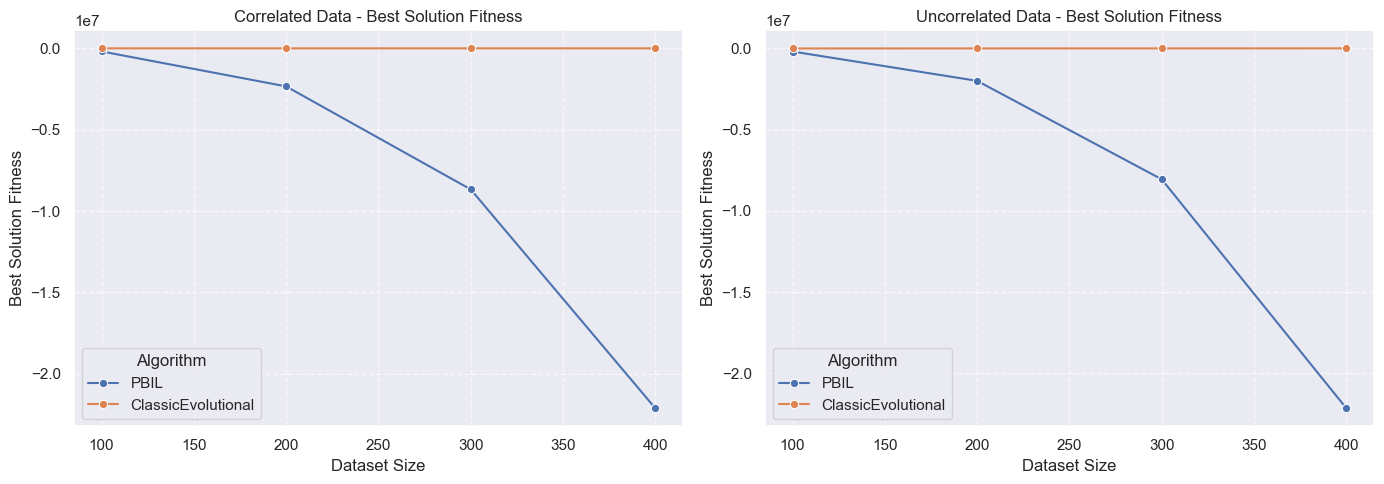

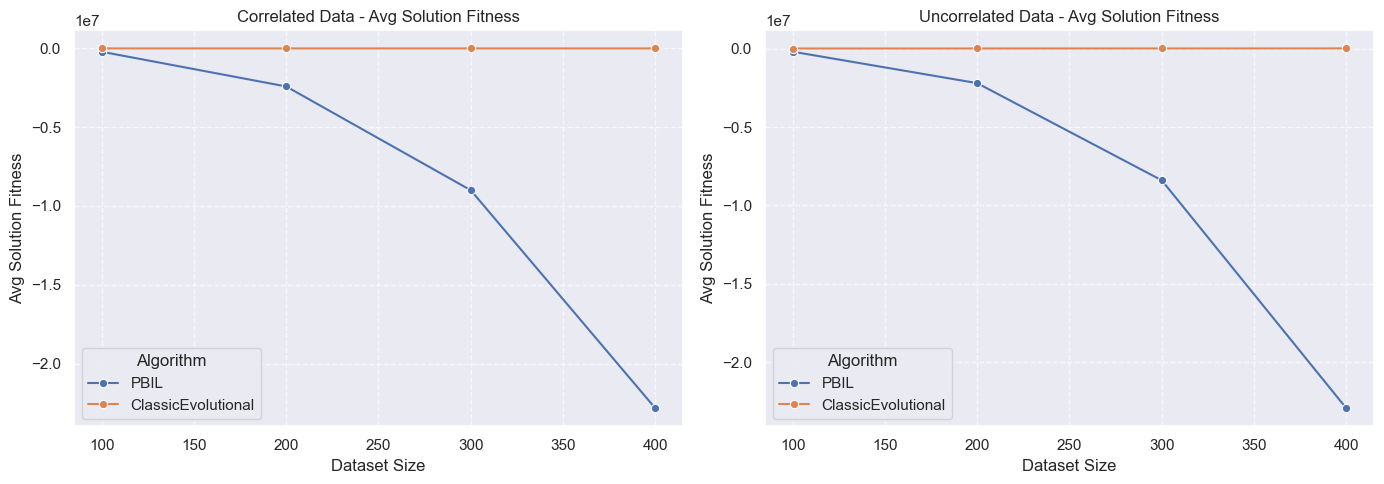

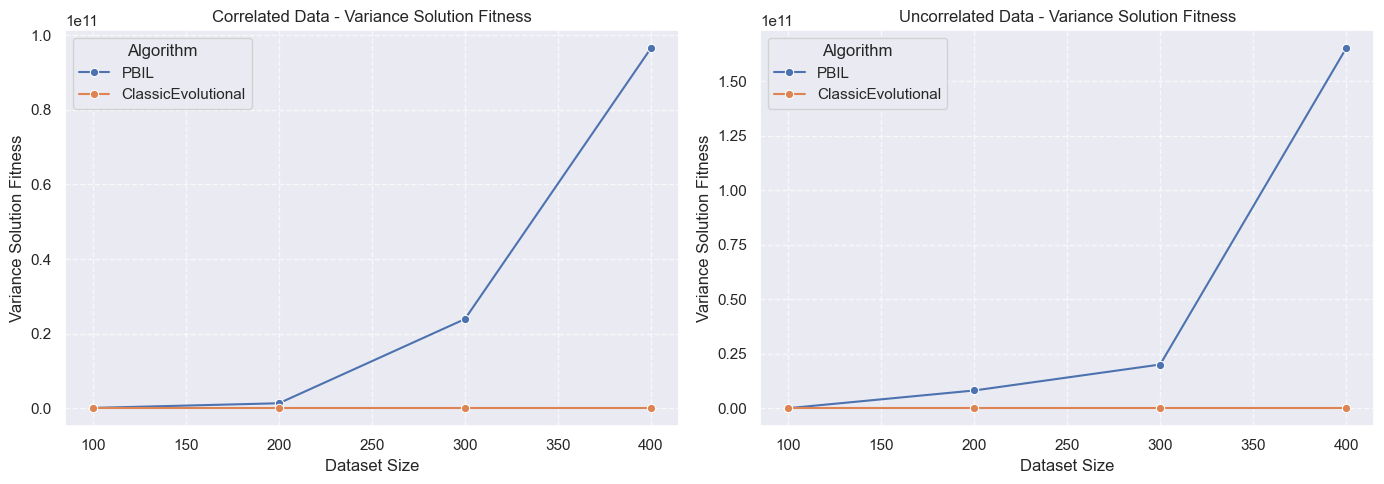

In [32]:
for metric in metrics:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    data_subsets = [
        (df[df['data_corelated'] == True], 'Correlated Data'),
        (df[df['data_corelated'] == False], 'Uncorrelated Data')
    ]
    
    for ax, (data, title) in zip(axes, data_subsets):
        sns.lineplot(
            ax=ax,
            data=data,
            x="dataset_size",
            y=metric,
            hue="algorithm_name",
            marker='o'
        )
        ax.set_title(f'{title} - {metric.replace("_", " ").title()}')
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel(metric.replace("_", " ").title())
        ax.legend(title="Algorithm")
        ax.grid(True, linestyle="--", alpha=0.7)
    
    plt.tight_layout()
    plt.show()

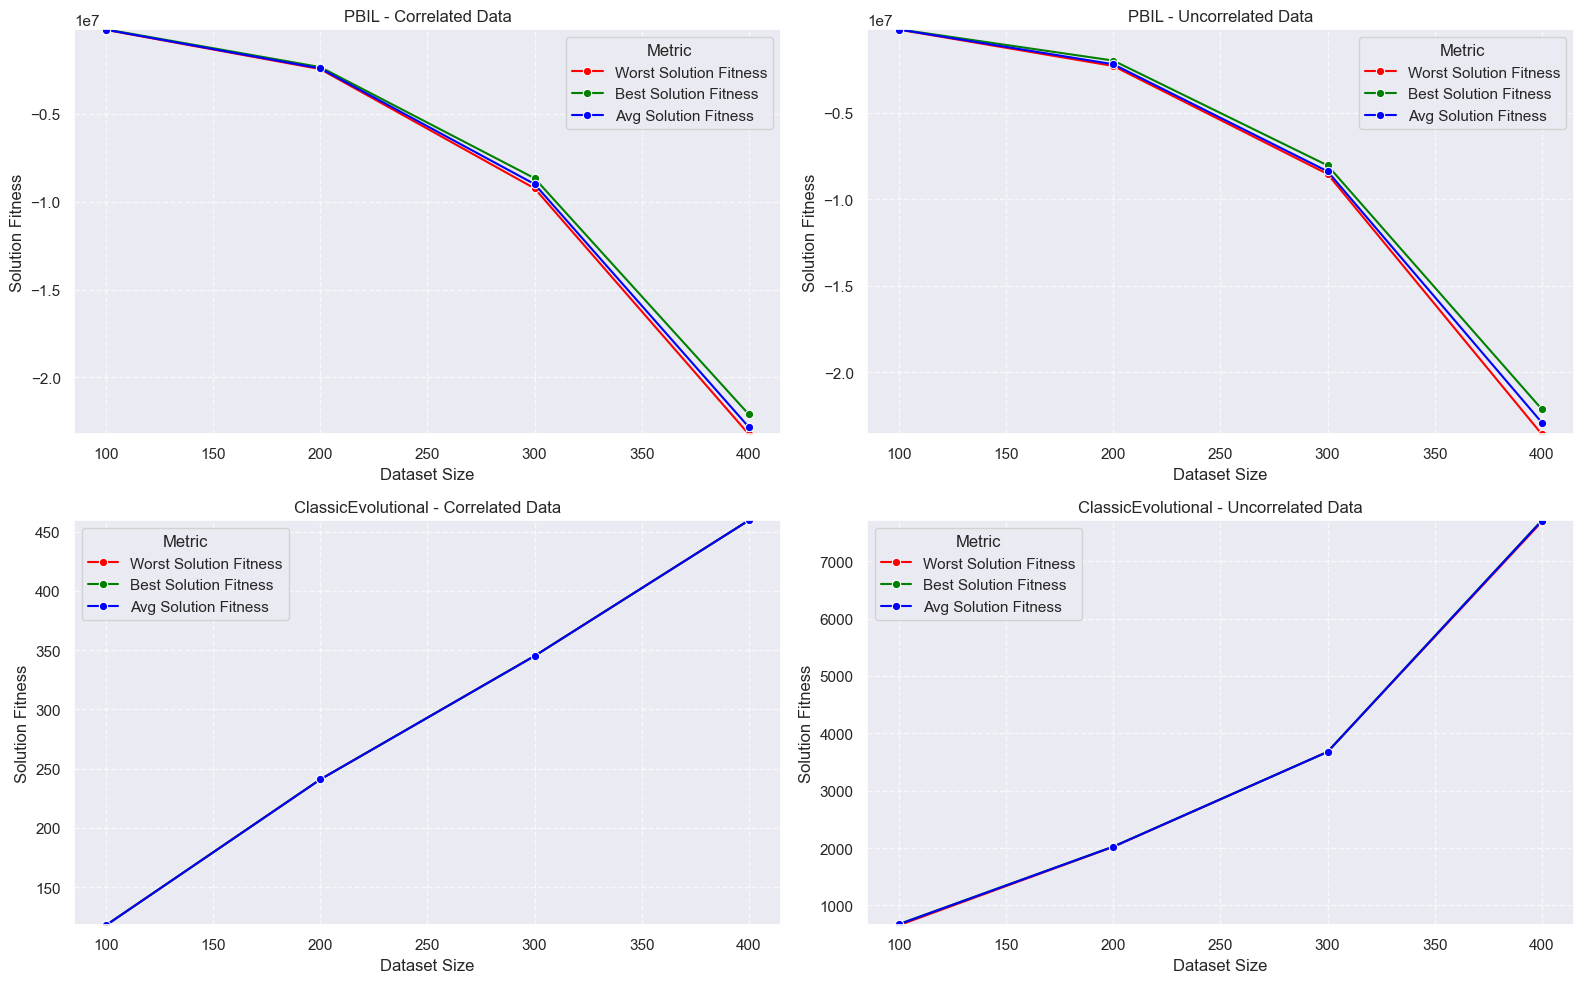

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
fitness_metrics = {
    "worst_solution_fitness": "red",
    "best_solution_fitness": "green",
    "avg_solution_fitness": "blue"
}

algorithms = df["algorithm_name"].unique()
data_types = [(df[df['data_corelated'] == True], 'Correlated Data'),
              (df[df['data_corelated'] == False], 'Uncorrelated Data')]

for row, algorithm in enumerate(algorithms):
    for col, (df_subset, data_type) in enumerate(data_types):
        ax = axes[row, col]
        df_algo = df_subset[df_subset['algorithm_name'] == algorithm]
        
        y_min = df_algo["worst_solution_fitness"].min()
        y_max = df_algo["best_solution_fitness"].max()
        ax.set_ylim(y_min, y_max)
        
        for metric, color in fitness_metrics.items():
            sns.lineplot(ax=ax, data=df_algo, x="dataset_size", y=metric, marker='o', label=metric.replace("_", " ").title(), color=color)
        
        ax.set_title(f"{algorithm} - {data_type}")
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel("Solution Fitness")
        ax.legend(title="Metric")
        ax.grid(True, linestyle="--", alpha=0.7)
        
plt.tight_layout()
plt.show()

## Test t-studenta

In [34]:
import scipy.stats as stats

In [35]:
data_related = df[df['data_corelated'] == True]
data_unrelated = df[df['data_corelated'] == False]

## Test studenta dla danych skorelowanych

In [36]:
pbil_results = data_related[df['algorithm_name'] == "PBIL"]['avg_solution_fitness']
ea_results = data_related[df['algorithm_name'] == "ClassicEvolutional"]['avg_solution_fitness']
t_stat, p_value = stats.ttest_ind(pbil_results, ea_results, equal_var=False)

print(f"T-statistic: {t_stat:0.4f}, P-value: {p_value:0.4f}")

T-statistic: -1.6911, P-value: 0.1894


C:\Users\Bartosz\AppData\Local\Temp\ipykernel_21216\528008030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pbil_results = data_related[df['algorithm_name'] == "PBIL"]['avg_solution_fitness']
C:\Users\Bartosz\AppData\Local\Temp\ipykernel_21216\528008030.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ea_results = data_related[df['algorithm_name'] == "ClassicEvolutional"]['avg_solution_fitness']


## Test studenta dla danych nieskorelowanych

In [26]:
pbil_results = data_unrelated[df['algorithm_name'] == "PBIL"]['avg_solution_fitness']
ea_results = data_unrelated[df['algorithm_name'] == "ClassicEvolutional"]['avg_solution_fitness']
t_stat, p_value = stats.ttest_ind(pbil_results, ea_results, equal_var=False)

print(f"T-statistic: {t_stat:0.4f}, P-value: {p_value:0.4f}")

T-statistic: -0.2850, P-value: 0.7770


C:\Users\Bartosz\AppData\Local\Temp\ipykernel_21216\3865646290.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pbil_results = data_unrelated[df['algorithm_name'] == "PBIL"]['avg_solution_fitness']
C:\Users\Bartosz\AppData\Local\Temp\ipykernel_21216\3865646290.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ea_results = data_unrelated[df['algorithm_name'] == "ClassicEvolutional"]['avg_solution_fitness']
